The objectives of this notebook is to learn to use pyTorch to define a simple convolution neural network. We will also  visualize the filters and the outputs from each convolution layer to gain an intuitive understanding of what convolution layer does in the CNN. 

In [1]:
import cv2
import torch
import torchvision

import numpy as np
import matplotlib.pyplot as plt
import matplotlib

%matplotlib inline

In [2]:
from platform import python_version
print(python_version())

3.7.4


In [3]:
import sys
print(sys.executable)

C:\Users\kliu14\Anaconda2\envs\vision\python.exe


# Load the data

(275, 227, 3)


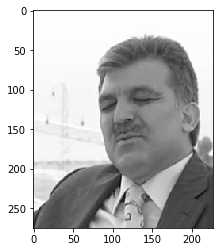

In [41]:
img_file = 'Abdullah_Gul_10.jpg'
color_img = cv2.imread(img_file)
print(color_img.shape)

gray_img = cv2.cvtColor(color_img, cv2.COLOR_BGR2GRAY)

plt.imshow(gray_img, cmap='gray')

# Define the filters

In [42]:
import numpy as np

## TODO: Feel free to modify the numbers here, to try out another filter!
filter_vals = np.array([[-1, -1, 1, 1], [-1, -1, 1, 1], [-1, -1, 1, 1], [-1, -1, 1, 1]])

print('Filter shape: ', filter_vals.shape)

# define four filters
filter_1 = filter_vals
filter_2 = -filter_1
filter_3 = filter_1.T
filter_4 = -filter_3
filters = np.array([filter_1, filter_2, filter_3, filter_4])

Filter shape:  (4, 4)


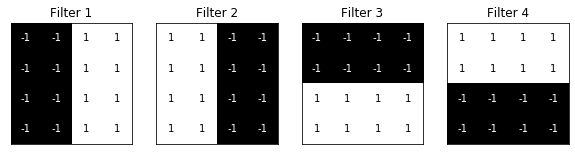

In [43]:
# visualize all four filters
fig = plt.figure(figsize=(10, 5))
for i in range(4):
    ax = fig.add_subplot(1, 4, i+1, xticks=[], yticks=[])
    ax.imshow(filters[i], cmap='gray')
    ax.set_title('Filter %s' % str(i+1))
    width, height = filters[i].shape
    for x in range(width):
        for y in range(height):
            ax.annotate(str(filters[i][x][y]), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if filters[i][x][y]<0 else 'black')

# Build the CNN

In [44]:
# We will define a CNN with three convolutional layers and one max pooling layer

import torch.nn as nn
import torch.nn.functional as F

In [45]:
# Note: all network class should subclass nn.Module
class Net(nn.Module):
    def __init__(self, weight):
        # Define the structure of the network
        super(Net, self).__init__()
        
        n_filters = weight.shape[0]
        n_inchannel = weight.shape[1]
        # Note: by definition, the weight to a conv2d has 4 dimensions:
        # (#Output_channels, #input_channnels, kernel_size[0], kernel_size[1])
        kernel_height, kernel_weight = weight.shape[2:]
        self.conv = nn.Conv2d(n_inchannel, n_filters, kernel_size=(kernel_height,kernel_weight))
        
        self.conv.weight = torch.nn.Parameter(weight)
        
        self.pool = nn.MaxPool2d(2,2)
        
    def forward(self, x):
        # Define the forward dataflow in the model
        
        conv_x = self.conv(x)
        activated_x = F.relu(conv_x)
        pooled_x = self.pool(activated_x)
        
        return conv_x, activated_x, pooled_x

In [46]:
weight = torch.from_numpy(filters).unsqueeze(1).type(torch.FloatTensor)
print(weight.shape)

model = Net(weight)
print(model)

torch.Size([4, 1, 4, 4])
Net(
  (conv): Conv2d(1, 4, kernel_size=(4, 4), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
)


# Visualize different layers

In [47]:
# helper function for visualizing the output of a given layer
# default number of filters is 4

def viz_layer(layer, n_filters=4):
    fig = plt.figure(figsize=(20, 20))
    
    for i in range(n_filters):
        ax = fig.add_subplot(1, n_filters, i+1, xticks=[], yticks=[])
        ax.imshow(np.squeeze(layer[0, i].data.numpy()), cmap='gray')
        ax.set_title('Output {}'.format(i+1))

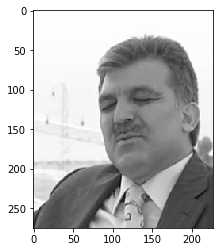

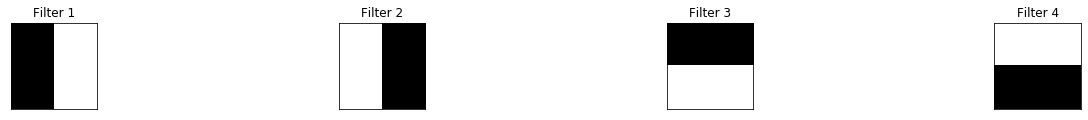

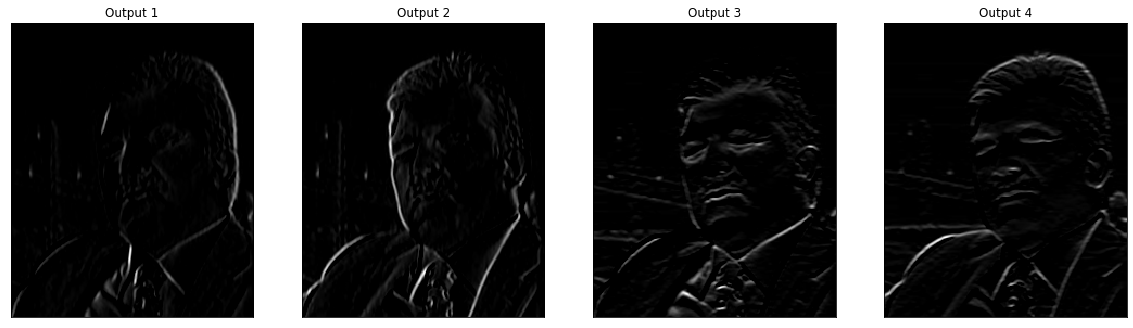

In [48]:
# plot original image
plt.imshow(gray_img, cmap='gray')

# visualize all filters
fig = plt.figure(figsize=(12, 6))
fig.subplots_adjust(left=0, right=1.5, bottom=0.8, top=1, hspace=0.05, wspace=0.05)
for i in range(4):
    ax = fig.add_subplot(1, 4, i+1, xticks=[], yticks=[])
    ax.imshow(filters[i], cmap='gray')
    ax.set_title('Filter %s' % str(i+1))

    
# convert the image into an input Tensor
gray_img_tensor = torch.from_numpy(gray_img).unsqueeze(0).unsqueeze(1).type(torch.FloatTensor)

# get all the layers 
conv_layer, activated_layer, pooled_layer = model(gray_img_tensor)

# visualize the output of the activated conv layer
viz_layer(activated_layer)

## Summary: 
Install pytorch is quite straightforward in conda. There is a command generator on pyTorch website: https://pytorch.org/?utm_source=Google&utm_medium=PaidSearch&utm_campaign=%2A%2ALP+-+TM+-+General+-+HV+-+US&utm_adgroup=PyTorch+Installation&utm_keyword=pytorch%20installation&utm_offering=AI&utm_Product=PyTorch&gclid=CjwKCAjwzdLrBRBiEiwAEHrAYiuqBZx79h08s8td8NbYkZJBeOb-lStqMw5CCZpHTX_PQQANMKOC7BoC2W4QAvD_BwE. 

In this notebook, we build a two layer CNN using pyTorch for the first time. The way to use pyTorch is quite pythonic, where we inherit the neural network module and write our own forward function. 

This example is only a "static" demonstration of the effect of applying a convolution kernel. However, model training through backprogation is not involved yet. As the next step, we will learn how to train the NN using pyTorch.